# Q1
### Delivery_time -> Predict delivery time using sorting time

**Independent Variable : Sorting Time**

**Dependent Variavle : Delivery Time**


## IMPORT LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## IMPORT DATASET

In [2]:
data=pd.read_csv('delivery_time.csv')

In [3]:
#viewing the data
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## PERFORMING EXPLORATORY DATA ANALYSIS

In [4]:
#getting the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
#checking the no of. rows and columns in the data
data.shape

(21, 2)

In [6]:
#checking for null values
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
#checking for duplicated values
data[data.duplicated()]

,Delivery Time,Sorting Time


In [8]:
#modifying column names Delivery Time as dt and Sorting Time as st
df=data.rename({'Delivery Time':'dt','Sorting Time':'st'},axis=1)
df=df.copy()

## GETTING STATISTICAL INFORMATION OF THE DATA

In [9]:
df.describe()

,dt,st
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
# Calculating correlation value
df.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


In [11]:
df['dt'].corr(df['st'])

0.8259972607955326

## VISUALIZATION

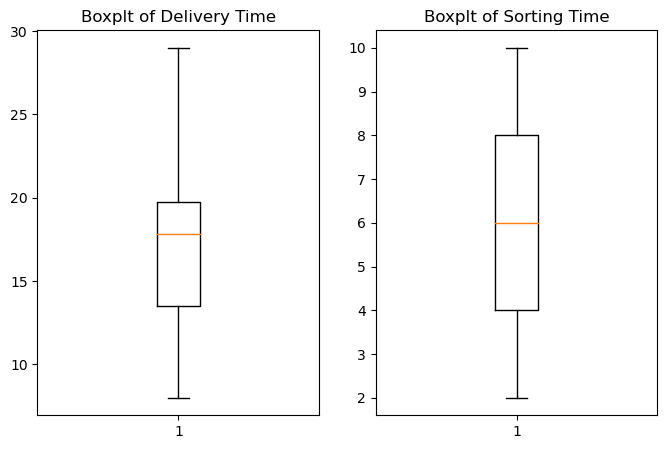

In [12]:
#boxplot
plt.figure(figsize=(8,5))
plt.subplot(121)
plt.title('Boxplt of Delivery Time')
plt.boxplot(df['dt'])
plt.subplot(122)
plt.title('Boxplt of Sorting Time')
plt.boxplot(df['st'])
plt.show()

**Hence there are no outliers in the data**

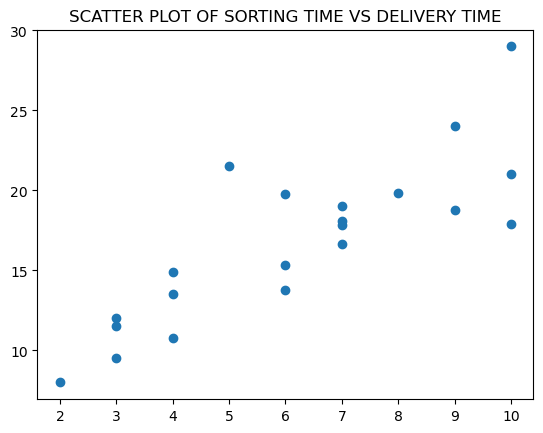

In [13]:
plt.title('SCATTER PLOT OF SORTING TIME VS DELIVERY TIME')
plt.scatter(df['st'],df['dt'])
plt.show()

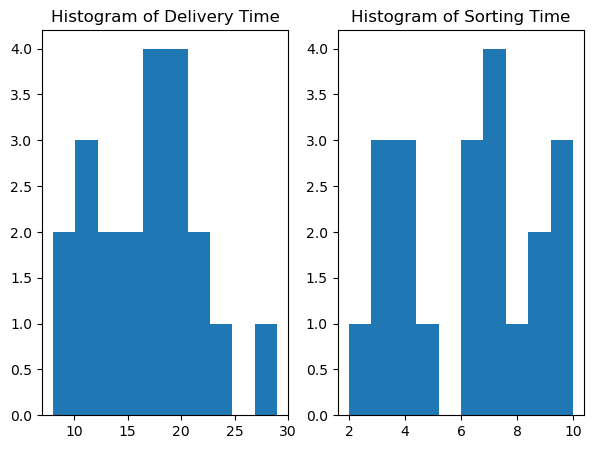

In [14]:
plt.figure(figsize=(7,5))
plt.subplot(121)
plt.title('Histogram of Delivery Time')
plt.hist(df['dt'])
plt.subplot(122)
plt.title('Histogram of Sorting Time')
plt.hist(df['st'])
plt.show()

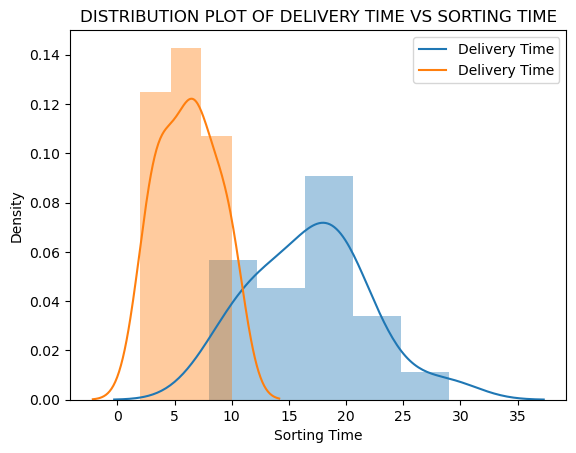

In [15]:
plt.title('DISTRIBUTION PLOT OF DELIVERY TIME VS SORTING TIME')
sns.distplot(df['dt'])
sns.distplot(df['st'])
plt.xlabel('Sorting Time')
plt.legend(['Delivery Time','Delivery Time'])
plt.show()

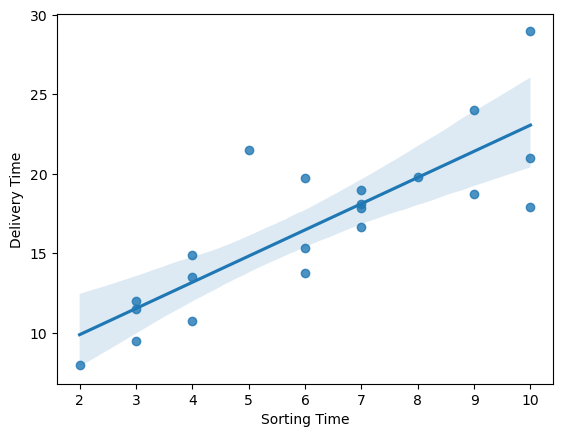

In [16]:
sns.regplot(x="st", y="dt", data=df)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

## CREATING LINEAR REGRESSION MODEL

**Using Ordinary Least Square Method**

In [17]:
model=smf.ols('dt ~ st',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        20:36:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**From the above model, R-squared = 0.682 ==> Accuracy of the model = 68.2%** 


### Performing Model Transformation To Improve The Accuracy Of The Model

**Applying logarithm on the independent variable**

In [18]:
model1=smf.ols('dt ~ np.log(st)',df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           2.64e-06
Time:                        20:36:58   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**From the above model, R-squared = 0.695 ==> Accuracy of the model = 69.5%** 


### Performing Model Transformation To Improve The Accuracy Of The Model

**Applying exponential method which is applying logarithm on the dependent variable**

In [19]:
model2=smf.ols('np.log(dt) ~ st',df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.59e-06
Time:                        20:36:58   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
st             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**From the above model, R-squared = 0.711 ==> Accuracy of the model = 71.1%** 


### Performing Model Transformation To Improve The Accuracy Of The Model

**Applying combination of Logarithm Model and Exponential Model which is, applying logarithm on both dependent and independent variables**

In [20]:
model3=smf.ols('np.log(dt) ~ np.log(st)',df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(dt)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.60e-07
Time:                        20:36:58   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(st)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**From the above model, R-squared = 0.772 ==> Accuracy of the model = 77.2%** 


### Performing Model Transformation To Improve The Accuracy Of The Model

**Applying quadratic method**

In [21]:
model4=smf.ols('dt ~ st+st**2',df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        20:36:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**From the above model, R-squared = 0.682 ==> Accuracy of the model = 68.2%** 


### Performing Model Transformation To Improve The Accuracy Of The Model

**Applying Square-root method**

In [22]:
model5=smf.ols('dt ~ np.sqrt(st)',df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           2.61e-06
Time:                        20:36:58   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(st)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Listing the R-squared values of all models in order to choose the best model**

In [23]:
#comparison of each model
r2 = {"MODEL":pd.Series(["r2_lin","r2_log","r2_exp","r2_log+exp","r2_quad","r2_sqrt"]),
        "Rsquare":pd.Series([model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared])}
t=pd.DataFrame(r2)
t 

,MODEL,Rsquare
0,r2_lin,0.682271
1,r2_log,0.695443
2,r2_exp,0.710948
3,r2_log+exp,0.772161
4,r2_quad,0.682271
5,r2_sqrt,0.695806


In [24]:
np.max([r2['Rsquare']])

0.77216134926874

**The model with the maximum R-squared value is the best  model**

**Hence calculate predicted values using the model which is a combination of logarithm and exponetial models**

In [25]:
pred=np.exp(model3.predict()) #np.exp() is used to convert the values back as the logarithm was applied while building the model
pred

array([22.59736023, 13.07012281, 16.65321647, 21.2185932 , 22.59736023,
       16.65321647, 18.25998132, 11.00591067, 22.59736023, 21.2185932 ,
       19.77660832, 13.07012281, 18.25998132, 11.00591067, 11.00591067,
       13.07012281, 16.65321647, 18.25998132,  8.63788712, 18.25998132,
       14.93432385])

## PLOTTING ACTUAL DATA VS PREDICTED DATA

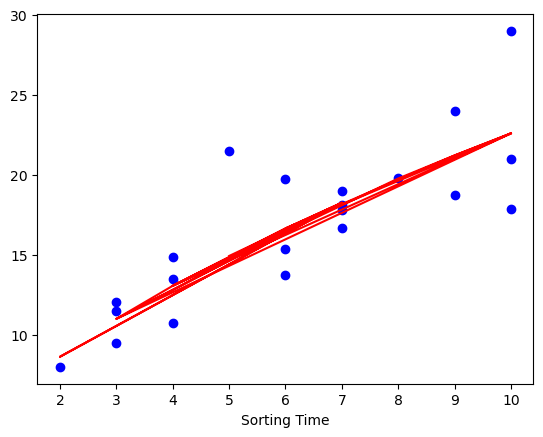

In [26]:
plt.scatter(df.st,df.dt,c="b") # Actual data
plt.plot(df.st,pred,"r") # Predicted data
plt.xlabel('Sorting Time')
plt.show()

## MODEL VALIDATION

**Using Root Mean Square Values**

In [27]:
rmse = np.sqrt(np.mean((np.array(df['st'])-model.predict())**2))
rmse 

10.722052392104553

In [28]:
rmse1 = np.sqrt(np.mean((np.array(df['st'])-model1.predict())**2))
rmse1 

10.749542066249484

In [29]:
rmse2 = np.sqrt(np.mean((np.array(df['st'])-model2.predict())**2))
rmse2

4.073146882300726

In [30]:
rmse3 = np.sqrt(np.mean((np.array(df['st'])-model3.predict())**2))
rmse3 

4.070895385024193

In [31]:
rmse4 = np.sqrt(np.mean((np.array(df['st'])-model4.predict())**2))
rmse4 

10.722052392104553

In [32]:
rmse5 = np.sqrt(np.mean((np.array(df['st'])-model5.predict())**2))
rmse5 

10.733248040710812

In [33]:
#comparison of each model
d1 = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_log+exp","rmse_quad","rmse_sqrt"]),
        "RMSE_Values":pd.Series([rmse,rmse1,rmse2,rmse3,rmse4,rmse5])}
table=pd.DataFrame(d1)
table 

,MODEL,RMSE_Values
0,rmse_lin,10.722052
1,rmse_log,10.749542
2,rmse_exp,4.073147
3,rmse_log+exp,4.070895
4,rmse_quad,10.722052
5,rmse_sqrt,10.733248


In [34]:
np.min([d1['RMSE_Values']])

4.070895385024193

In [35]:
d1['MODEL'].iloc[3]

'rmse_log+exp'

**Hence, it is validated that, the combined model of logarithm and exponential models is the best choice for predicting the delivery time**

In [36]:
df=df.rename({'dt':'Delivery Time','st':'Sorting Time'},axis=1)
df['Predicted Delivey Time']=pred

In [37]:
df

,Delivery Time,Sorting Time,Predicted Delivey Time
0,21.00,10,22.597360
1,13.50,4,13.070123
2,19.75,6,16.653216
3,24.00,9,21.218593
4,29.00,10,22.597360
5,15.35,6,16.653216
6,19.00,7,18.259981
7,9.50,3,11.005911
8,17.90,10,22.597360
9,18.75,9,21.218593


# Q2

**Salary_hike -> Build a prediction model for Salary_hike**

**Independent Variable: YearsExperience**

**Dependent Variable: Salary**

In [38]:
data_q2=pd.read_csv('Salary_Data.csv')
data_q2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## PERFORMING EXPLORATORY DATA ANALYSIS

In [39]:
_#modifying column names YearsExperience as ye and Salary as s
df=data_q2.rename({'YearsExperience':'ye','Salary':'s'},axis=1)
df=df.copy()
df

,ye,s
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [40]:
#checking the no of rows and columns of the dataset
df.shape

(30, 2)

In [41]:
#Extracting the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ye      30 non-null     float64
 1   s       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [42]:
#checking for null values
df.isnull().sum()

ye    0
s     0
dtype: int64

In [43]:
#checking for duplicate values
df[df.duplicated()]

,ye,s


## GETTING STATISTICAL INFORMATION OF THE DATA

In [44]:
df.describe()

,ye,s
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [45]:
#calculating correlation of both the variables
df.corr()

,ye,s
ye,1.000000,0.978242
s,0.978242,1.000000


In [46]:
df['s'].corr(df['ye'])

0.9782416184887598

## VISUALIZATION

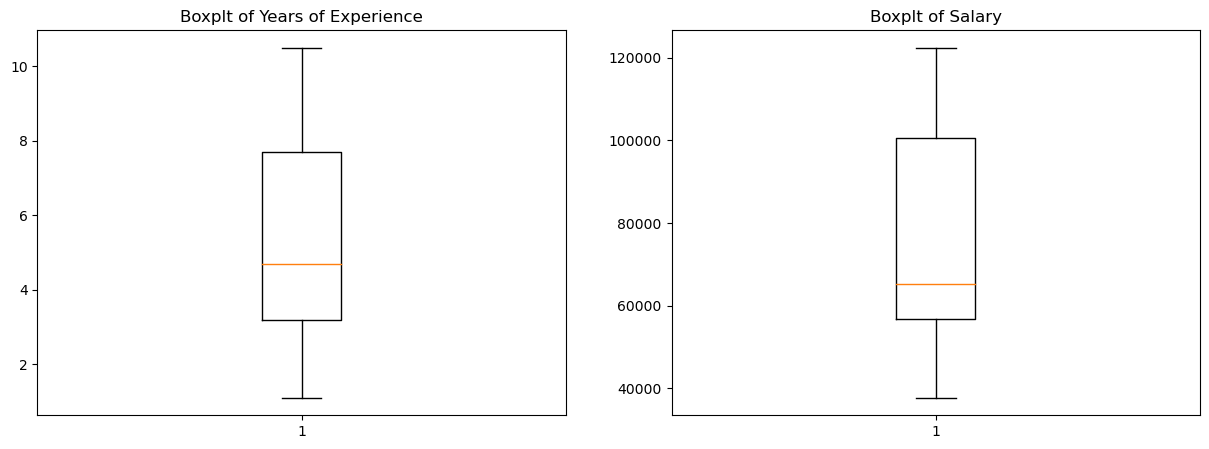

In [47]:
#boxplot
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Boxplt of Years of Experience')
plt.boxplot(df['ye'])
plt.subplot(122)
plt.title('Boxplt of Salary')
plt.boxplot(df['s'])
plt.show()

**Hence there are no outliers in our data**

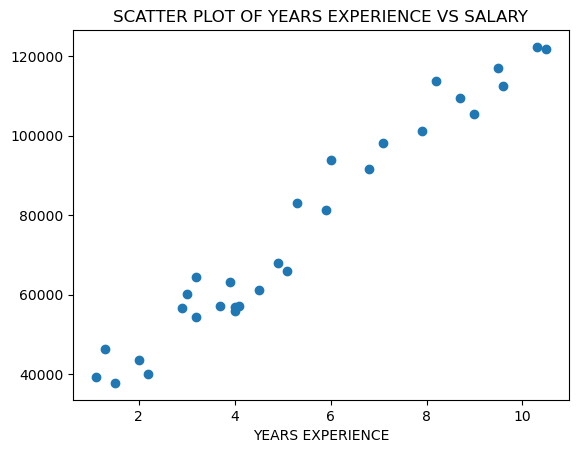

In [48]:
#scatter plot
plt.title('SCATTER PLOT OF YEARS EXPERIENCE VS SALARY')
plt.scatter(df['ye'],df['s'])
plt.xlabel('YEARS EXPERIENCE')
plt.show()

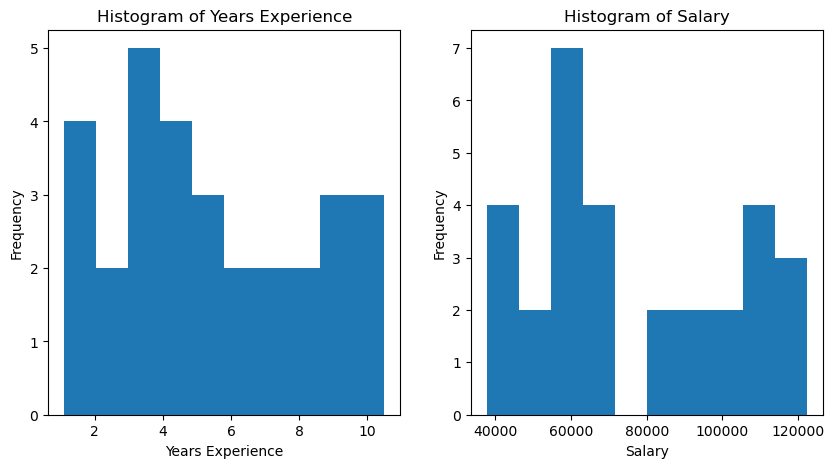

In [49]:
#Histogram
plt.figure(figsize=(10,5))
plt.ylabel('Frequency')
plt.subplot(121)
plt.title('Histogram of Years Experience')
plt.xlabel('Years Experience')
plt.ylabel('Frequency')
plt.hist(df['ye'])
plt.subplot(122)
plt.title('Histogram of Salary')
plt.hist(df['s'])
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

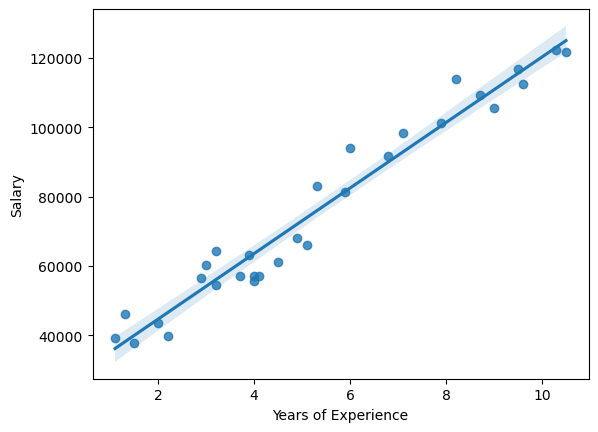

In [50]:
#regression plot
sns.regplot(x="ye", y="s", data=df)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

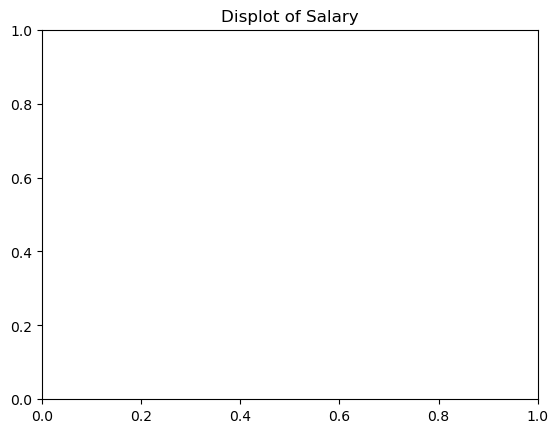

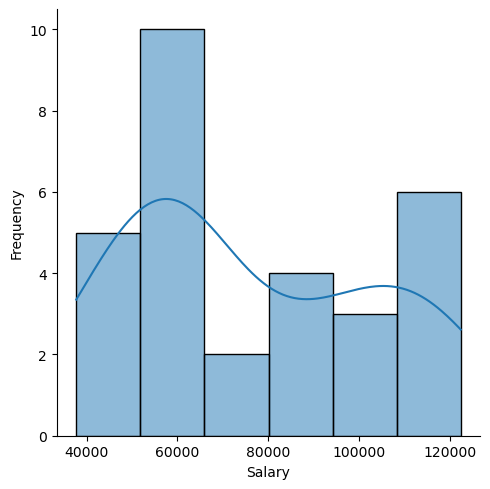

In [51]:
plt.title('Displot of Salary')
sns.displot(df['s'],kde=True)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

## CREATING LINEAR REGRESSION MODEL

In [52]:
m=smf.ols('s ~ ye',df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      s   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        20:37:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**APPLYING LOGARITHM MODEL**

In [53]:
m1=smf.ols('s ~ np.log(ye)',df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      s   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.25e-13
Time:                        20:37:01   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(ye)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**APPLYING EXPONENTIAL MODEL**

In [54]:
m2=smf.ols('np.log(s) ~ ye',df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(s)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           7.03e-18
Time:                        20:37:01   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
ye             0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**APPLYING COMBINATION OF LOGARITHM AND EXPONENTIAL MODEL**

In [55]:
m3=smf.ols('np.log(s) ~ np.log(ye)',df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(s)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           7.40e-16
Time:                        20:37:01   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
np.log(ye)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**APPLYING CUBE-ROOT METHOD**

In [56]:
m4=smf.ols('s ~ np.cbrt(ye)',df).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      s   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     287.7
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           2.91e-16
Time:                        20:37:01   Log-Likelihood:                -312.29
No. Observations:                  30   AIC:                             628.6
Df Residuals:                      28   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.705e+04   7989.534     -7.141      0.000   -7.34e+04   -4.07e+04
np.cbrt(ye)  7.896e+04   4655.395     16.962      0.000    6.94e+04    8.85e+04
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.575
Skew:                           0.047   Prob(JB):                        0.750
Kurtosis:                       2.328   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#comparison of each model
r_2 = {"MODEL":pd.Series(["r2_lin","r2_log","r2_exp","r2_log+exp","r2_cbrt"]),
        "Rsquare":pd.Series([m.rsquared,m1.rsquared,m2.rsquared,m3.rsquared,m4.rsquared])}
t=pd.DataFrame(r_2)
t 

,MODEL,Rsquare
0,r2_lin,0.956957
1,r2_log,0.853889
2,r2_exp,0.931967
3,r2_log+exp,0.905215
4,r2_cbrt,0.911310


**Since maximum r-squared=0.956, accuracy of the model = 95.6%**

**Hence  we can decide that the linear model is the best model for the prediction, as the r-squared value is maximum among the other models**

In [58]:
pred1=np.round(m.predict(),4)
pred1

array([ 36187.1588,  38077.1512,  39967.1437,  44692.1248,  46582.1173,
        53197.0909,  54142.0872,  56032.0796,  56032.0796,  60757.0608,
        62647.0533,  63592.0495,  63592.0495,  64537.0457,  68317.0306,
        72097.0156,  73987.008 ,  75877.0005,  81546.9779,  82491.9741,
        90051.944 ,  92886.9327, 100446.9025, 103281.8912, 108006.8724,
       110841.8611, 115566.8423, 116511.8385, 123126.8121, 125016.8046])

## PLOTTING ACTUAL DATA VS PREDICTED DATA

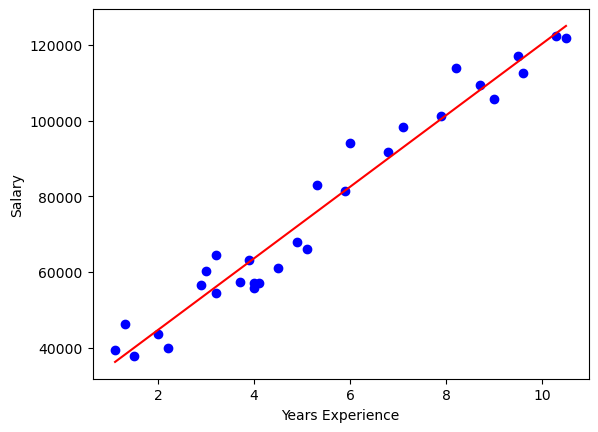

In [59]:
plt.scatter(df.ye,df.s,c="b") # Actual data
plt.plot(df.ye,pred1,"r") # Predicted data
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

In [60]:
df=df.rename({'ye':'YearsExperience','s':'Salary'},axis=1)
df['Predicted Salary']=pred1
df

,YearsExperience,Salary,Predicted Salary
0,1.1,39343.0,36187.1588
1,1.3,46205.0,38077.1512
2,1.5,37731.0,39967.1437
3,2.0,43525.0,44692.1248
4,2.2,39891.0,46582.1173
5,2.9,56642.0,53197.0909
6,3.0,60150.0,54142.0872
7,3.2,54445.0,56032.0796
8,3.2,64445.0,56032.0796
9,3.7,57189.0,60757.0608
